<a href="https://colab.research.google.com/github/vitornascimentto/Lica/blob/master/autoencoderFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import io
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array

from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed
from keras.utils import plot_model

In [13]:
uploaded = files.upload()

Saving USIM5.SA-S.csv to USIM5.SA-S (1).csv


In [14]:
df = pd.read_csv(io.BytesIO(uploaded['USIM5.SA-S.csv']))
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,2.17778,2.57778,2.05556,2.55333,2.255598,9250650.0
1,2000-01-10,2.60000,2.88889,2.35556,2.48889,2.198672,16568100.0
2,2000-01-17,2.44444,2.53333,2.33333,2.48889,2.198672,8909100.0
3,2000-01-24,2.48889,2.50889,2.24444,2.35556,2.080889,3367350.0
4,2000-01-31,2.31111,2.50667,2.20000,2.47778,2.188858,4637700.0
5,2000-02-07,2.50889,2.62222,2.31111,2.31111,2.041622,10461600.0
6,2000-02-14,2.42667,2.42667,2.11111,2.22222,1.963098,7546500.0
7,2000-02-21,2.21111,2.31111,2.11111,2.11111,1.864944,5350500.0
8,2000-02-28,2.12222,2.21778,1.93333,2.04444,1.806048,13322250.0
9,2000-03-06,2.04444,2.16667,2.03778,2.05556,1.815871,4853700.0


In [15]:
'Linhas: {} | Colunas: {}'.format(df.shape[0], df.shape[1])

'Linhas: 992 | Colunas: 7'

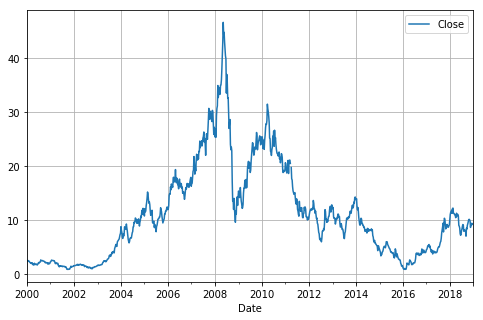

In [16]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('USIM5.SA-S.csv', parse_dates=['Date'], date_parser=dateparse)

data.plot(x='Date', y='Close', figsize=(8, 5))
plt.grid(True)

In [17]:
lista = []
#inicio = 0
#final = 10

for x in range(0, 100, 10):

  seq_in = np.array(df['Close'][x:x+10])

  print('Entradas')
  print(seq_in)

  n_in = len(seq_in)
  seq_in = seq_in.reshape((1, n_in, 1))

  seq_out = seq_in[:, 1:, :]
  n_out = n_in - 1

  model = Sequential()
  model.add(LSTM(100, activation='relu', input_shape=(n_in,1)))
  model.add(RepeatVector(n_out))
  model.add(LSTM(100, activation='relu', return_sequences=True))
  model.add(TimeDistributed(Dense(1)))
  model.compile(optimizer='adam', loss='mse')
  plot_model(model, show_shapes=True, to_file='predict_lstm_autoencoder.png')

  model.fit(seq_in, seq_out, epochs=300, verbose=0)

  result = model.predict(seq_in, verbose=0)
  print('\nSaídas')
  print(result[0,:,0])

  for i in range(1):
    for j in range(len(result[0])):
      for k in range(len(result[0][0])):
        lista.append(result[i][j][k])
        
  #inicio = final
  #final += 10

Entradas
[2.55333 2.48889 2.48889 2.35556 2.47778 2.31111 2.22222 2.11111 2.04444
 2.05556]

Saídas
[2.488782  2.4887848 2.3564944 2.4788327 2.3174133 2.1997304 2.121262
 2.0671372 2.0379858]
Entradas
[1.91111 2.07778 1.92222 1.97778 1.67778 1.74222 1.67778 1.97778 1.76222
 1.75556]

Saídas
[2.0589795 1.9284954 1.9987582 1.6147491 1.7674273 1.7073473 1.9354408
 1.7674817 1.7558059]
Entradas
[1.77778 1.84444 1.74    1.64444 1.81111 1.85333 2.11111 1.98222 2.16889
 2.17778]

Saídas
[1.8444349 1.739662  1.6477685 1.7928923 1.9131439 2.0044193 2.077374
 2.1346605 2.1789758]
Entradas
[2.21111 2.60444 2.47778 2.46667 2.44444 2.48667 2.41111 2.39333 2.33333
 2.33333]

Saídas
[2.6040812 2.4778657 2.462248  2.469193  2.4509087 2.422641  2.3894904
 2.3545997 2.3199828]
Entradas
[2.21111 2.06889 2.15556 2.08889 2.06    2.      2.08889 1.80444 2.02222
 1.95556]

Saídas
[2.0691323 2.1533206 2.097136  2.0563276 2.0147698 1.9831578 1.9638602
 1.9546093 1.9521791]
Entradas
[1.88222 1.95111 2.2     2.2

In [0]:
serie = pd.Series(lista)

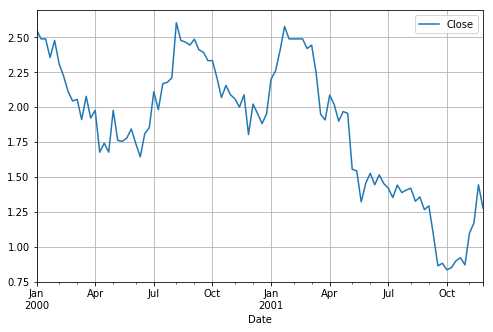

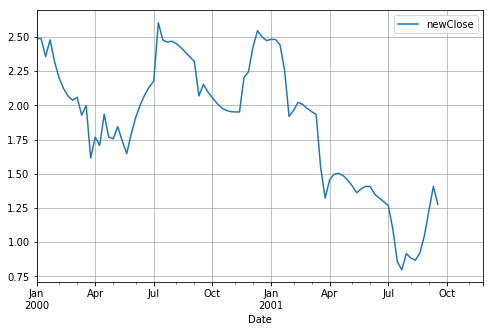

In [19]:
dateparse = lambda x: pd.datetime.strptime(x, '%Y-%m-%d')
data = pd.read_csv('USIM5.SA-S.csv', parse_dates=['Date'], date_parser=dateparse)

data = data.iloc[: 100, :]
data['newClose'] = serie

data.plot(x='Date', y='Close', figsize=(8, 5))
plt.grid(True)

data.plot(x='Date', y='newClose', figsize=(8, 5))
plt.grid(True)